<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [3]:
import re
import string
from bs4 import BeautifulSoup as bs

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

import squarify
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_lg")

In [6]:
!pwd

/Users/nickburkhalter/Desktop/Lambda School/Unit 4/DS-Unit-4-Sprint-1-NLP/module2-vector-representations


## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [34]:
##### Your Code Here #####
file_path = '/Users/nickburkhalter/Desktop/Lambda School/Unit 4/DS-Unit-4-Sprint-1-NLP/module2-vector-representations/data/job_listings.csv'
jobs = pd.read_csv(file_path, index_col=0)
jobs.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


## 2) Use Spacy to tokenize / clean the listings 

In [35]:
##### Your Code Here #####
STOP_WORDS = nlp.Defaults.stop_words.union([' '])

def remove_unicode_chars(df):
    df = df.copy()
    df['description'] = df['description'].str.replace(r'(\\(x|n)[a-z0-9]{0,2})', '')
    
    return df

def remove_html(df):
    df = df.copy()
    df['description'] = df['description'].apply(lambda x: bs(x).get_text().replace("\\n", " "))
    df['description'] = df['description'].str.replace('b"', '')
    df['description'] = df['description'].str.replace("b'", '')
    df['description'] = df['description'].apply(lambda x: re.sub('[0-9]+', '', x))
    df['description'] = df['description'].str.lower()
    df['tokenized'] = df['description'].apply(lambda x: [token.text for token in nlp(x) 
                                                         if not token.is_stop])
   
    return df

In [36]:
jobs = remove_unicode_chars(jobs)
jobs.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/><br/><p>As a Data S...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA multiple locations</l...,Data Scientist


In [37]:
jobs = remove_html(jobs)
jobs.head()

,description,title,tokenized
0,job requirements:conceptual understanding in m...,Data scientist,"[job, requirements, :, conceptual, understandi..."
1,"job descriptionas a data scientist , you will ...",Data Scientist I,"[job, descriptionas, data, scientist, ,, help,..."
2,as a data scientist you will be working on con...,Data Scientist - Entry Level,"[data, scientist, working, consulting, busines..."
3,"$, - $, a monthcontractunder the general super...",Data Scientist,"[$, ,, -, $, ,, monthcontractunder, general, s..."
4,location: usa multiple locations+ years of an...,Data Scientist,"[location, :, usa, , multiple, locations+, ye..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [38]:
##### Your Code Here #####
count_vect = CountVectorizer()

dtm = count_vect.fit_transform(jobs['description'].values)
dtm_df = pd.DataFrame(dtm.todense(),columns=count_vect.get_feature_names())

dtm_df.head()

,aa,aap,ab,abernathy,abilities,abilitiesability,abilitiesdevelops,abilitiesexperience,abilitiesinterpersonal,abilitiesproblem,...,zeus,zf,zfs,zheng,zillow,zonesability,zoom,zuckerberg,zurich,zurichs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [39]:
##### Your Code Here #####
word_ranks = dtm_df.sum().sort_values(ascending=False)

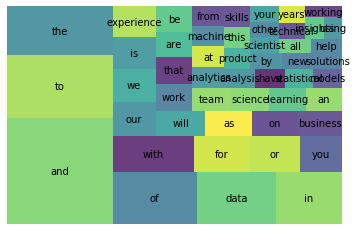

In [43]:
squarify.plot(sizes=word_ranks.values[:50], label=word_ranks.index[:50], alpha=0.8)
plt.axis('off')
plt.show();

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [45]:
##### Your Code Here #####
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words = 'english')

dtm_tfidf = tfidf.fit_transform(jobs['description'].values)
dtm_tfidf_df = pd.DataFrame(dtm_tfidf.todense(),columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm_tfidf_df.head()

,aa,aap,ab,abernathy,abilities,abilitiesability,abilitiesdevelops,abilitiesexperience,abilitiesinterpersonal,abilitiesproblem,...,zeus,zf,zfs,zheng,zillow,zonesability,zoom,zuckerberg,zurich,zurichs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.108824,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [46]:
##### Your Code Here #####
nn  = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm_tfidf_df)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [47]:
dtm_tfidf_df.iloc[0]

aa                        0.00000
aap                       0.00000
ab                        0.00000
abernathy                 0.00000
abilities                 0.00000
abilitiesability          0.00000
abilitiesdevelops         0.00000
abilitiesexperience       0.00000
abilitiesinterpersonal    0.00000
abilitiesproblem          0.00000
ability                   0.05196
able                      0.00000
abminimum                 0.00000
abounds                   0.00000
aboveproficiency          0.00000
abovestatistical          0.00000
abroad                    0.00000
absence                   0.00000
absolutely                0.00000
absorbing                 0.00000
abstract                  0.00000
abstracting               0.00000
abstraction               0.00000
abstractions              0.00000
abstractly                0.00000
abundant                  0.00000
abuse                     0.00000
academia                  0.00000
academic                  0.00000
academicfield 

In [48]:
# Query Using kneighbors 
nn.kneighbors([dtm_tfidf_df.iloc[0]])

(array([[0.        , 1.31440281, 1.31831968, 1.32783814, 1.32943754]]),
 array([[  0, 274, 276, 366, 338]]))

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 